In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv('rym_clean1.csv')
df = df.dropna()
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,position,release_name,artist_name,release_date,release_type,primary_genres,secondary_genres,descriptors,avg_rating,rating_count,review_count
1,2,Kid A,Radiohead,2000-10-03,album,"Art Rock, Experimental Rock, Electronic","Ambient, Electronic, IDM","cold, melancholic, futuristic, anxious, atmosp...",4.23,61658,751
2,3,The Dark Side of the Moon,Pink Floyd,1973-03-23,album,"Art Rock, Progressive Rock","Psychedelic Rock, Space Rock","philosophical, atmospheric, introspective, exi...",4.21,60192,1557
3,4,Loveless,My Bloody Valentine,1991-11-11,album,"Shoegaze, Noise Pop","Dream Pop, Neo-Psychedelia","noisy, ethereal, atmospheric, romantic, love, ...",4.24,53174,1264
4,5,My Beautiful Dark Twisted Fantasy,Kanye West,2010-11-22,album,"Pop Rap, Hip Hop",Art Pop,"epic, boastful, passionate, sampling, hedonist...",4.09,52149,638
5,6,In Rainbows,Radiohead,2007-10-10,album,"Art Rock, Alternative Rock","Electronic, Dream Pop, Art Pop","lush, malevocals, introspective, melancholic, ...",4.20,51335,752


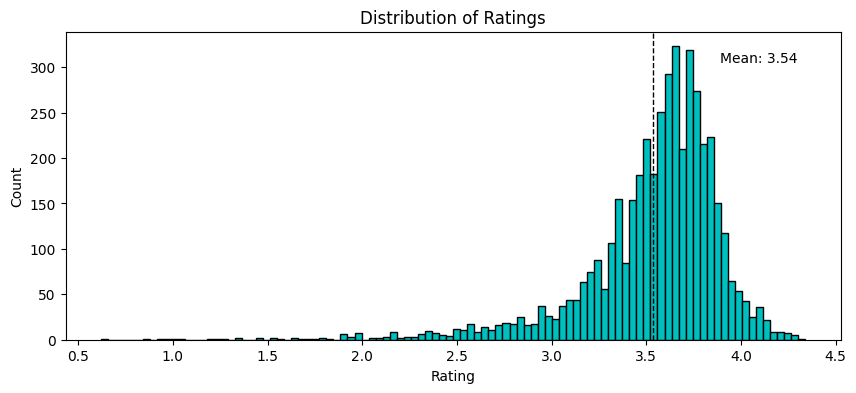

In [31]:
ratings = df['avg_rating']
mean_rating = np.mean(ratings)
std_rating = np.std(ratings)
plt.figure(figsize=(10, 4))
plt.hist(ratings, bins=100, color='c', edgecolor='black')
plt.axvline(mean_rating, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean_rating*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean_rating))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

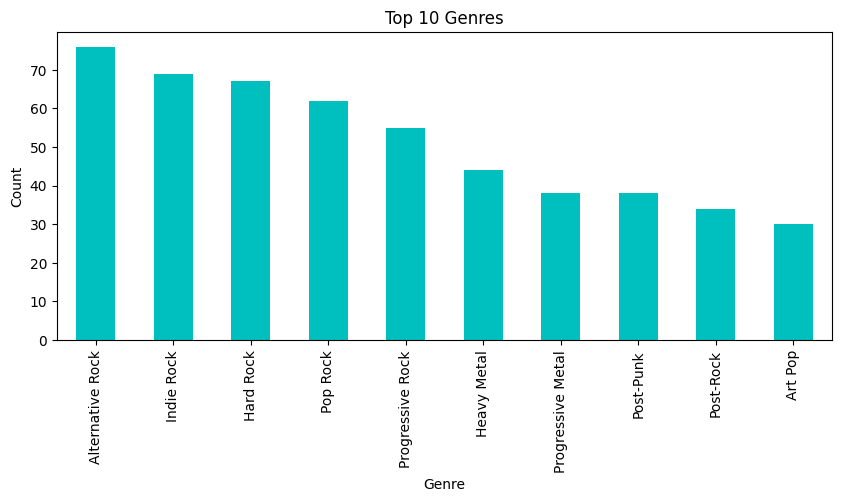

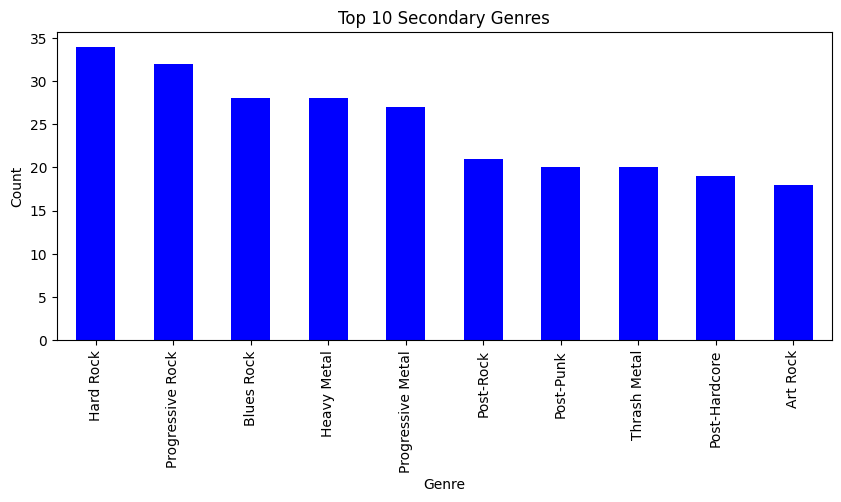

In [32]:
primary_genre = df['primary_genres']
secondary_genre = df['secondary_genres']
primary_genre = primary_genre.value_counts()
primary_genre = primary_genre[:10,]
secondary_genre = secondary_genre.value_counts()
secondary_genre = secondary_genre[:10,]
plt.figure(figsize=(10, 4))
primary_genre.plot(kind='bar', color='c')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres')
plt.show()
plt.figure(figsize=(10, 4))
secondary_genre.plot(kind='bar', color='b')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Secondary Genres')
plt.show()

In [35]:
popular_combination = df.groupby(['primary_genres', 'secondary_genres']).size().reset_index(name='count')
popular_combination = popular_combination.sort_values('count', ascending=False).head(1)
most_popular_combination = popular_combination[['primary_genres', 'secondary_genres']]
print('most popular combination\n', most_popular_combination)

best_combination = df.groupby(['primary_genres', 'secondary_genres']).agg({'avg_rating': 'mean'}).reset_index()
best_combination = best_combination.sort_values('avg_rating', ascending=False).head(1)
print('best rated combination\n', best_combination)

most popular combination
      primary_genres   secondary_genres
1847    Heavy Metal  Progressive Metal
best rated combination
                      primary_genres                      secondary_genres  \
644  Avant-Garde Jazz, Third Stream  Experimental Big Band, Flamenco Jazz   

     avg_rating  
644        4.34  


<h2>Recommend similar albums</h2>

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Encode the primary_genres and secondary_genres
le = LabelEncoder()
df['primary_genres'] = le.fit_transform(df['primary_genres'])
df['secondary_genres'] = le.fit_transform(df['secondary_genres'])
df['artist_name'] = le.fit_transform(df['artist_name'])
df['descriptors'] = le.fit_transform(df['descriptors'])
df['release_name'] = le.fit_transform(df['release_name'])

X = df.drop(columns=['release_type', 'release_date', 'avg_rating', 'rating_count', 'review_count'])
y = df['avg_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.1638594894561598
